#ABSTRACT


The Typography MNIST (TMNIST) dataset offers a collection of over 281,000 images of 94 different characters, such as letters, numbers, and symbols, displayed in various font styles. Each image is a 28x28 pixel grayscale representation of a character. This dataset is designed for machine learning tasks related to recognizing different typographic characters, making it a valuable resource for improving text recognition technologies. Its variety challenges models to identify characters across diverse styles, contributing to advancements in digital text analysis and the broader field of computational creativity.

In [ ]:
import os #use operating system dependent functionality or iterate files
import numpy as np #scientific computing in Python, used for working with arrays
import pandas as pd #library for data manipulation and analysis, particularly useful for working with tabular data
from tensorflow import keras #open-source platform for machine learning that includes Keras, a high-level neural networks API
from tensorflow.keras.models import Sequential #Components of the Keras API used to build neural network layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
#optimizer from TensorFlow's Keras API, it's an extension to stochastic gradient descent that has been adopted as the default or recommended optimizer for many deep learning tasks
from sklearn.model_selection import train_test_split
#Functions from scikit-learn, a machine learning library for Python. These are used for splitting datasets into training and test sets and for preprocessing labels, respectively.
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
#A utility function to convert integer labels into a one-hot encoding format

# List all files in the input directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Load the dataset
dataset_path = '/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv'  # Adjust this to your dataset's path
df = pd.read_csv(dataset_path)

# display the first 5 rows of the DataFrame:
print(df.head())


/kaggle/input/tmnist-alphabet-94-characters/94_character_TMNIST.csv
                  names labels    1    2    3    4    5    6    7    8  ...  \
0         Salsa-Regular      6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  MouseMemoirs-Regular      D  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2     Creepster-Regular      f  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3     SeoulNamsan-Light      /  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  HachiMaruPop-Regular      F  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   775  776  777  778  779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 786 columns]


# Preprocessing




#####Normalizing Pixel Values

X = df.iloc[:, 2:].values.astype('float32') / 255.0

This line selects all rows and columns starting from the third column to the end from a DataFrame df, which presumably contains pixel values of images.

The .astype('float32') converts the data type to float32, and dividing by 255.0 normalizes the pixel values to a range between 0 and 1.

Normalization is a common preprocessing step to help neural networks learn more efficiently.

##Extract Labels

y = df.iloc[:, 1].values

This line extracts the labels (or targets) for the classification from the second column of the DataFrame. These labels represent the class/category for each image.

##Encode Labels

The labels are then encoded into integers using  LabelEncoder(). This is necessary because machine learning models work with numerical data, not strings or categorical labels.

y_categorical = to_categorical(y_encoded)

After encoding the labels into integers, to_categorical is used to convert them into one-hot encoded vectors. One-hot encoding transforms the integer-encoded labels into a binary matrix (important for multi-class classification tasks) to be used as the targets during training.

##Splitting dataset

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

This line splits the dataset into training and testing sets, with 80% of the data used for training and 20% for testing. random_state is set for reproducibility of results.

##Reshape Images

The images are reshaped to the format (num_samples, height, width, channels), which is required by many deep learning frameworks, especially if working with convolutional neural networks (CNNs).

Since the images are grayscale, the number of channels is 1.
This is done by reshaping

X_train and X_test to (-1, 28, 28, 1)

X_train_reshaped = X_train.reshape(-1, 28, 28, 1)

X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

# CNN - Concolutional Nueral Network

1) A Convolutional Neural Network (CNN) is a deep learning
algorithm primarily used for processing visual information, such as images.

2) It automatically identifies important features without human supervision, making it highly effective for tasks like image classification, object detection, and more.

3) Key components include convolutional layers that detect features, pooling layers that reduce image dimensionality while preserving features, and fully connected layers that interpret these features to make predictions or classifications.

4) CNNs stand out for their ability to efficiently learn and predict with high accuracy from visual data, making them applicable in various fields such as facial recognition, medical image analysis, and autonomous vehicles.

##Reshape Operation

**Parameters:**

-1: This value tells the reshape function to automatically calculate the size of this dimension based on the original size of the array and the other specified dimensions. It effectively means "whatever size is needed"

28, 28: These numbers specify that each image should be reshaped to 28 pixels in height and 28 pixels in width. This matches the dimensionality of the images in the dataset (assuming they are originally flattened).

1: This indicates that each image has a single color channel, i.e., the images are grayscale. Color images (like those in RGB format) would typically have 3 channels.

## What is happening in CNN

1) Initially, X_train and X_test contain arrays of pixel values for images, presumably flattened into one-dimensional arrays per image. Given that each image is a 28x28 pixel grayscale image, each of these arrays would have 784 elements (since 28*28=784).

2) The reshape operation transforms these one-dimensional arrays into four-dimensional arrays where:
The first dimension (-1) is the number of images (automatically calculated based on the total size of the array and the size of the other dimensions). This is effectively the batch size for training or testing.

3) The second and third dimensions ('28','28') represent the height and width of each image, respectively. This structure aligns with the original dimensions of the images before they were flattened, restoring them to their 2D format which is necessary for convolutional operations that leverage spatial information within the images.

4) The fourth dimension (1) signifies the number of color channels. Since the images are grayscale, there is only one channel. This differs from color images, which typically have three channels (red, green, and blue).

In [ ]:
X = df.iloc[:, 2:].values.astype('float32') / 255.0  # Normalizing pixel values
y = df.iloc[:, 1].values  # Labels

# Encode labels to integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # Convert to one-hot encoding

X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Reshape images (assuming 28x28 grayscale images)
X_train_reshaped = X_train.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test.reshape(-1, 28, 28, 1)

##Why is reshaping required

This reshaping is a crucial preprocessing step for using CNNs, as these networks require input data in a format that includes dimensions for samples, height, width, and channels to effectively learn from the spatial structure of images.

#CNN Model Architecture

**Input Layer Shape (28, 28, 1):** Defines the expected input format as 28 pixels by 28 pixels in a grayscale image (1 color channel), matching the preprocessed image dimensions.

**Conv2D Layer (32 Filters, 3x3 Kernel):** Applies 32 distinct 3x3 filters to the input images to detect patterns, such as edges and textures. Uses ReLU activation to introduce non-linearity, allowing for complex pattern recognition.

**MaxPooling2D Layer (2x2 Pool Size):** Reduces the spatial dimensions (height and width) of the output from the Conv2D layer, summarizing the features in a smaller map to reduce computation and prevent overfitting.

**Flatten Layer:** Converts the 2D feature maps into a 1D vector, preparing the data for input into the dense layers for classification.

**First Dense Layer (64 Neurons):** A fully connected layer that uses ReLU activation. It interprets the features extracted by the convolutional and pooling layers, learning non-linear combinations of these features.

**Second Dense Layer (Output Layer):** Determines the model's output size based on the number of classes (from y_categorical.shape[1]). Utilizes softmax activation to calculate a probability distribution over different classes for classification.

#CNN Model Compilation

**Optimizer (Adam):** Uses the Adam optimizer with a learning rate of 0.001, adjusting the model's weights based on the gradient of the loss function to minimize errors during training.

**Loss Function (Categorical Crossentropy):** Suitable for multi-class classification problems where each target is represented as a one-hot encoded vector. It measures the difference between the predicted probabilities and the actual distribution.

**Metrics (Accuracy):** Tracks the model's performance in correctly classifying images by comparing the predicted labels against the true labels during training and evaluation phases.



In [ ]:
model = Sequential([
    Input(shape=(28, 28, 1)),  # Define the input shape explicitly with an Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(y_categorical.shape[1], activation='softmax')
])

# Use `learning_rate` instead of `lr`
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

##Summary

This setup and compilation process prepares the CNN model for training on image data, optimizing its ability to accurately classify images into their respective categories based on learned patterns.

#Model Training

**X_train_reshaped:** This is the array of training images that have been reshaped to fit the model's input requirements. These are the features the model will learn from.

**y_train:** This array contains the one-hot encoded labels corresponding to the training images. These labels are what the model will predict, and they are used to calculate the loss during training.

**epochs=50:** This specifies the number of times the entire training dataset will be passed through the network. An epoch is one complete presentation of the data set to be learned to a learning machine. Setting it to 50 means the learning process will iterate over the entire dataset 50 times.

**validation_data=(X_test_reshaped, y_test):** This tuple contains the test dataset, also reshaped to meet the model's input requirements, and its corresponding labels. The model will not learn from this data; instead, it will be used to evaluate the model's performance after each epoch. This helps monitor the model's ability to generalize to new data and can help identify issues like overfitting.

In [ ]:
history = model.fit(X_train_reshaped, y_train, epochs=50, validation_data=(X_test_reshaped, y_test))


Epoch 1/50
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 94s 14ms/step - accuracy: 0.7632 - loss: 0.9276 - val_accuracy: 0.8997 - val_loss: 0.3586
Epoch 2/50
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 141s 13ms/step - accuracy: 0.9053 - loss: 0.3189 - val_accuracy: 0.9089 - val_loss: 0.3041
Epoch 3/50
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 93s 14ms/step - accuracy: 0.9210 - loss: 0.2566 - val_accuracy: 0.9203 - val_loss: 0.2698
Epoch 4/50
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 92s 13ms/step - accuracy: 0.9305 - loss: 0.2207 - val_accuracy: 0.9245 - val_loss: 0.2588
Epoch 5/50
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 148s 14ms/step - accuracy: 0.9345 - loss: 0.2003 - val_accuracy: 0.9263 - val_loss: 0.2556
Epoch 6/50
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 134s 13ms/step - accuracy: 0.9405 - loss: 0.1779 - val_accuracy: 0.9277 - val_loss: 0.2558
Epoch 7/50
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 147s 14ms/step - accuracy: 0.9452 - loss: 0.1637 - val_accuracy: 0.9271 - val_loss: 0.2562
Epoch 8/50
6853/6853 ━━━━━━━━━━━━━━━━━━━━ 140s 13ms/step - accuracy: 0.9

##Summary of the Training Process

The model learns to classify images by adjusting its weights based on the X_train_reshaped features and y_train labels across 50 iterations (epochs).

After each epoch, the model is evaluated on the X_test_reshaped and y_test validation dataset to monitor its performance on data it hasn't learned from. This evaluation gives insights into how well the model is generalizing.

Throughout the training and validation process, performance metrics such as loss and accuracy are calculated. These metrics are crucial for understanding how well the model is doing and making adjustments if necessary.

The process repeats for the specified number of epochs, allowing the model to improve its weights iteratively based on the feedback from the training loss and validation metrics.

This training approach helps in developing a model that not only performs well on the training data but also generalizes well to new, unseen data.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9278 - loss: 0.5576
Test accuracy: 92.79%


##Summary of model performance on Test Data

After training the CNN model on the training data and validating its performance on the validation data, this step is crucial for assessing how well the model can generalize to new, unseen data. The test dataset was not used during the training process, making it a good indicator of the model's real-world performance. The test accuracy gives a straightforward metric to gauge the effectiveness of the model in classifying images according to the learned patterns and features. A high accuracy on the test set suggests that the model is well-tuned and has learned generalizable features, while a low accuracy might indicate overfitting to the training data or underfitting.

##Model Visualisation on Predicted Cases

Make Predictions: The model predicts the class probabilities for the reshaped test dataset X_test_reshaped.

Classify Predictions: It converts these probabilities to class indices (the class with the highest probability) using np.argmax(predictions, axis=1) for predicted classes, and similarly for true classes from y_test.

Identify Correct Predictions: The code identifies the indices where the predicted classes match the true classes, indicating correct predictions.

Shuffle for Randomness: The correct prediction indices are shuffled to randomize the images selected for display. This step ensures variety in the images shown.

Plotting Setup: A figure with 3 rows and 4 columns of subplots is created, setting the figure size to 10 by 10 inches, intending to display 12 images.

Display Correct Predictions: For the first 12 shuffled, correctly predicted images, each is reshaped back to its original 28x28 pixel format and displayed in its respective subplot. Each subplot is titled with the predicted and true class indices to indicate what the model predicted versus the actual label. The images are displayed in grayscale (cmap="Greys"), and the axes are turned off for a cleaner look.

Presentation: The layout is adjusted for tight spacing to avoid overlapping content, and the plot is displayed with plt.show()

1714/1714 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


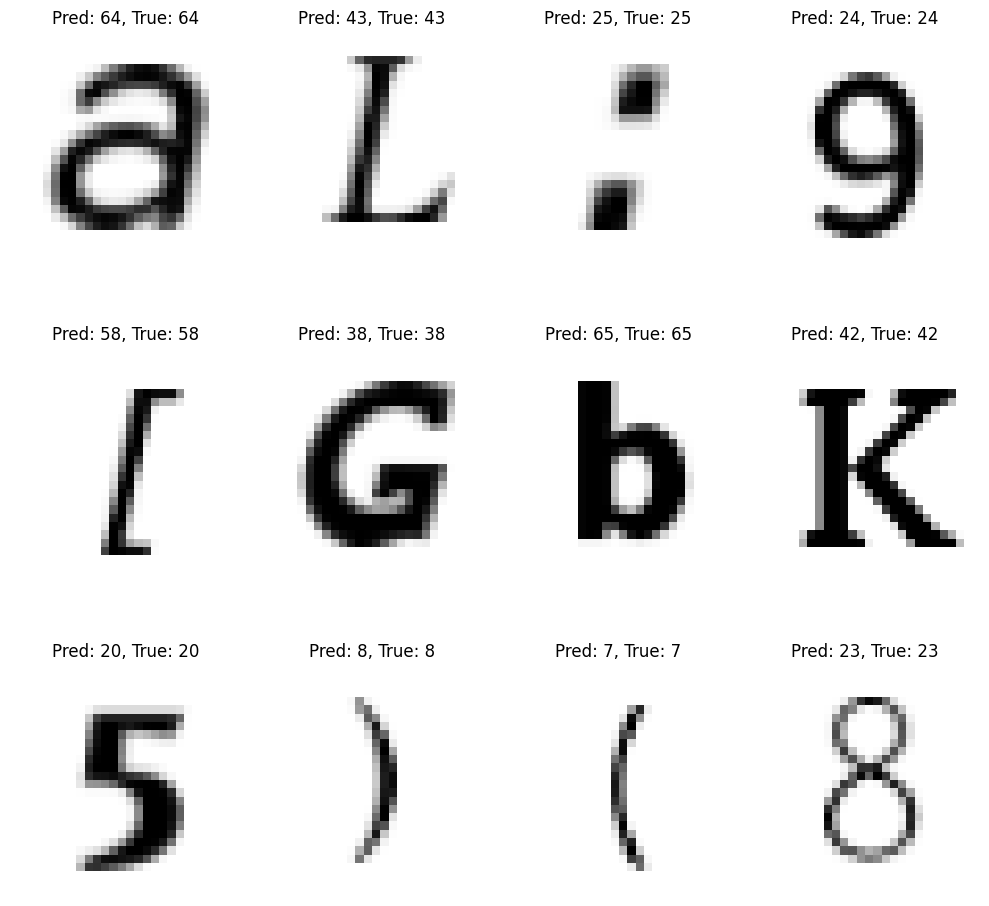

In [ ]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

# Make predictions on the test set (reshaped and possibly preprocessed)
predictions = model.predict(X_test_reshaped)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

# Find indices of correct predictions
correct_indices = np.where(predicted_classes == true_classes)[0]

# Shuffle correct indices for randomness
np.random.shuffle(correct_indices)

# Create a figure with 3x4 subplots and set the figure size
fig, ax = plt.subplots(3, 4, figsize=(10, 10))
axes = ax.flatten()

# Display the first 12 correctly predicted images
for i, idx in enumerate(correct_indices[:12]):
    img = np.reshape(X_test[idx], (28, 28))  # Assuming X_test needs reshaping
    axes[i].imshow(img, cmap="Greys")
    axes[i].set_title(f"Pred: {predicted_classes[idx]}, True: {true_classes[idx]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


The code visually demonstrates the model's accuracy by showcasing a sample of correctly predicted images from the test dataset. It provides an intuitive and direct way to assess the model's performance, highlighting the predictions that match the true labels. This visualization can be particularly useful for understanding the model's capabilities and identifying patterns or characteristics that the model has learned effectively.

#CONCLUSION

**Quantitative Evaluation:**
Test Accuracy: High accuracy on the test set indicates that the model has successfully learned generalizable features from the training data and can effectively apply these learnings to correctly classify images it has not seen before. This is a crucial metric for assessing the model's real-world applicability.

**Overfitting vs. Underfitting:** The performance on the test data helps identify whether the model is overfitting (performing well on training data but poorly on test data) or underfitting (performing poorly across both training and test data), guiding further model tuning and adjustments.

**Qualitative Evaluation:**
Visual Inspection: By visually inspecting correctly predicted images from the test dataset, researchers and practitioners can gain insights into what the model is "seeing" and how it's making decisions. This can help in understanding the strengths and weaknesses of the model.

**Model Trustworthiness:** Displaying a selection of correctly classified images alongside their predicted and true labels builds confidence in the model's predictions and can help stakeholders understand and trust the model's capabilities.

**Conclusion Summary:**
Evaluating a CNN model on unseen test data and visualizing its correct predictions offers a holistic view of the model's performance. The test accuracy metric provides a quantitative measure of how well the model generalizes, which is crucial for practical applications.

Meanwhile, visualizing the model's correct predictions offers qualitative insights into the model's classification abilities, reinforcing trust in its capabilities. Together, these evaluation methods ensure that the model is not only statistically sound but also practically effective in real-world scenarios.

For models that exhibit high accuracy and demonstrate a robust understanding of the features across a variety of images, this process underscores the model's readiness for deployment in similar tasks. Conversely, if gaps in performance are identified, this comprehensive evaluation can guide further refinement and optimization of the model.

